In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import os
import time
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

#Pandas setting for better visualization of dataframe.
pd.options.display.float_format='{:.2f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 

In [2]:
dataset = pd.read_csv('spotify_taylorswift.csv')
dataset.head()

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.58,0.57,0.49,0.00,0.12,-6.46,0.03,0.42,76.01
1,1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.66,0.17,0.88,0.00,0.10,-2.10,0.03,0.82,105.59
2,2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.62,0.29,0.42,0.00,0.12,-6.94,0.02,0.29,99.95
3,3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.58,0.05,0.78,0.00,0.32,-2.88,0.03,0.43,115.03
4,4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.42,0.22,0.48,0.00,0.12,-5.77,0.03,0.26,175.56


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        171 non-null    int64  
 1   name              171 non-null    object 
 2   album             171 non-null    object 
 3   artist            171 non-null    object 
 4   release_date      171 non-null    object 
 5   length            171 non-null    int64  
 6   popularity        171 non-null    int64  
 7   danceability      171 non-null    float64
 8   acousticness      171 non-null    float64
 9   energy            171 non-null    float64
 10  instrumentalness  171 non-null    float64
 11  liveness          171 non-null    float64
 12  loudness          171 non-null    float64
 13  speechiness       171 non-null    float64
 14  valence           171 non-null    float64
 15  tempo             171 non-null    float64
dtypes: float64(9), int64(3), object(4)
memory us

In [4]:
dataset.select_dtypes(include=object).nunique()

name            169
album           9  
artist          1  
release_date    9  
dtype: int64

In [5]:
dataset.select_dtypes(exclude=object).describe()

,Unnamed: 0,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
count,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00
mean,85.00,236663.52,61.23,0.59,0.32,0.59,0.00,0.15,-7.32,0.07,0.42,124.14
std,49.51,40456.72,11.90,0.12,0.33,0.19,0.02,0.09,2.88,0.11,0.19,31.48
min,0.00,107133.00,0.00,0.29,0.00,0.12,0.00,0.03,-17.93,0.02,0.05,68.53
25%,42.50,211833.00,58.00,0.53,0.03,0.46,0.00,0.09,-8.86,0.03,0.28,96.05
50%,85.00,234000.00,63.00,0.59,0.16,0.61,0.00,0.12,-6.70,0.04,0.42,121.96
75%,127.50,254447.00,67.00,0.66,0.67,0.73,0.00,0.17,-5.34,0.06,0.55,146.04
max,170.00,403887.00,82.00,0.90,0.97,0.94,0.18,0.66,-2.10,0.91,0.94,207.48


In [6]:
dataset = dataset.drop(['Unnamed: 0', 'name', 'artist', 'release_date', 'instrumentalness'], axis=1)
dataset

,album,length,popularity,danceability,acousticness,energy,liveness,loudness,speechiness,valence,tempo
0,Taylor Swift,232106,49,0.58,0.57,0.49,0.12,-6.46,0.03,0.42,76.01
1,Taylor Swift,173066,54,0.66,0.17,0.88,0.10,-2.10,0.03,0.82,105.59
2,Taylor Swift,203040,59,0.62,0.29,0.42,0.12,-6.94,0.02,0.29,99.95
3,Taylor Swift,199200,49,0.58,0.05,0.78,0.32,-2.88,0.03,0.43,115.03
4,Taylor Swift,239013,50,0.42,0.22,0.48,0.12,-5.77,0.03,0.26,175.56
...,...,...,...,...,...,...,...,...,...,...,...
166,Fearless (Taylor's Version),277591,74,0.66,0.16,0.82,0.07,-6.27,0.05,0.71,135.94
167,Fearless (Taylor's Version),244236,65,0.61,0.85,0.37,0.08,-8.82,0.03,0.13,106.01
168,Fearless (Taylor's Version),189495,67,0.59,0.23,0.61,0.09,-7.06,0.04,0.51,90.20
169,Fearless (Taylor's Version),208608,66,0.56,0.51,0.47,0.11,-11.55,0.05,0.41,101.93


In [7]:
popularity = dataset['popularity']
dataset = dataset.drop('popularity', axis=1)
dataset.insert(loc=len(dataset.columns), column='popularity', value=popularity)
dataset

,album,length,danceability,acousticness,energy,liveness,loudness,speechiness,valence,tempo,popularity
0,Taylor Swift,232106,0.58,0.57,0.49,0.12,-6.46,0.03,0.42,76.01,49
1,Taylor Swift,173066,0.66,0.17,0.88,0.10,-2.10,0.03,0.82,105.59,54
2,Taylor Swift,203040,0.62,0.29,0.42,0.12,-6.94,0.02,0.29,99.95,59
3,Taylor Swift,199200,0.58,0.05,0.78,0.32,-2.88,0.03,0.43,115.03,49
4,Taylor Swift,239013,0.42,0.22,0.48,0.12,-5.77,0.03,0.26,175.56,50
...,...,...,...,...,...,...,...,...,...,...,...
166,Fearless (Taylor's Version),277591,0.66,0.16,0.82,0.07,-6.27,0.05,0.71,135.94,74
167,Fearless (Taylor's Version),244236,0.61,0.85,0.37,0.08,-8.82,0.03,0.13,106.01,65
168,Fearless (Taylor's Version),189495,0.59,0.23,0.61,0.09,-7.06,0.04,0.51,90.20,67
169,Fearless (Taylor's Version),208608,0.56,0.51,0.47,0.11,-11.55,0.05,0.41,101.93,66


Text(0.5, 1.0, 'Popularity Distribution')

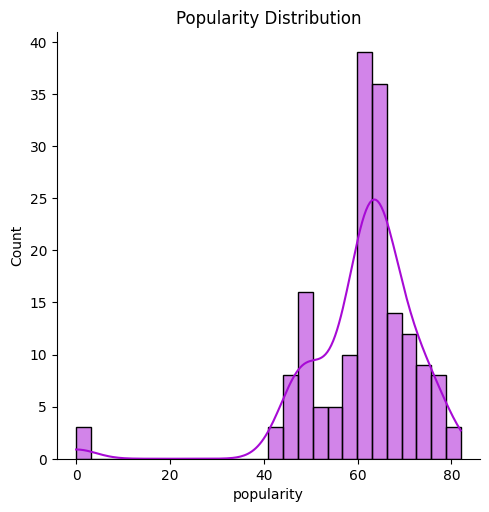

In [8]:
sns.displot(x='popularity', data=dataset, kde=True, color='#a70ad5')
plt.title('Popularity Distribution')

In [9]:
dataset = dataset.drop(dataset.loc[dataset['popularity'] <=20].index)
dataset = dataset.reset_index()
dataset = dataset.drop('index', axis=1)
dataset

,album,length,danceability,acousticness,energy,liveness,loudness,speechiness,valence,tempo,popularity
0,Taylor Swift,232106,0.58,0.57,0.49,0.12,-6.46,0.03,0.42,76.01,49
1,Taylor Swift,173066,0.66,0.17,0.88,0.10,-2.10,0.03,0.82,105.59,54
2,Taylor Swift,203040,0.62,0.29,0.42,0.12,-6.94,0.02,0.29,99.95,59
3,Taylor Swift,199200,0.58,0.05,0.78,0.32,-2.88,0.03,0.43,115.03,49
4,Taylor Swift,239013,0.42,0.22,0.48,0.12,-5.77,0.03,0.26,175.56,50
...,...,...,...,...,...,...,...,...,...,...,...
163,Fearless (Taylor's Version),277591,0.66,0.16,0.82,0.07,-6.27,0.05,0.71,135.94,74
164,Fearless (Taylor's Version),244236,0.61,0.85,0.37,0.08,-8.82,0.03,0.13,106.01,65
165,Fearless (Taylor's Version),189495,0.59,0.23,0.61,0.09,-7.06,0.04,0.51,90.20,67
166,Fearless (Taylor's Version),208608,0.56,0.51,0.47,0.11,-11.55,0.05,0.41,101.93,66


Text(0.5, 1.0, 'Popularity Distribution\n(After Deletion)')

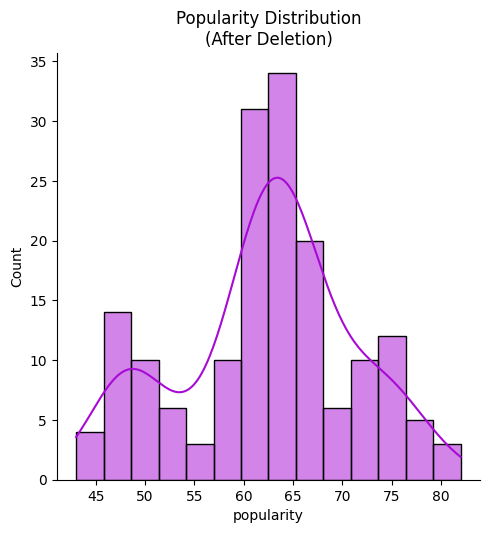

In [10]:
sns.displot(x='popularity', data=dataset, kde=True, color='#a70ad5')
plt.title('Popularity Distribution\n(After Deletion)')

In [11]:
from scipy.stats import skew
print(skew(dataset['popularity'], bias=False))

-0.24360906678672503


Text(0.5, 1.0, 'Album vs Popularity')

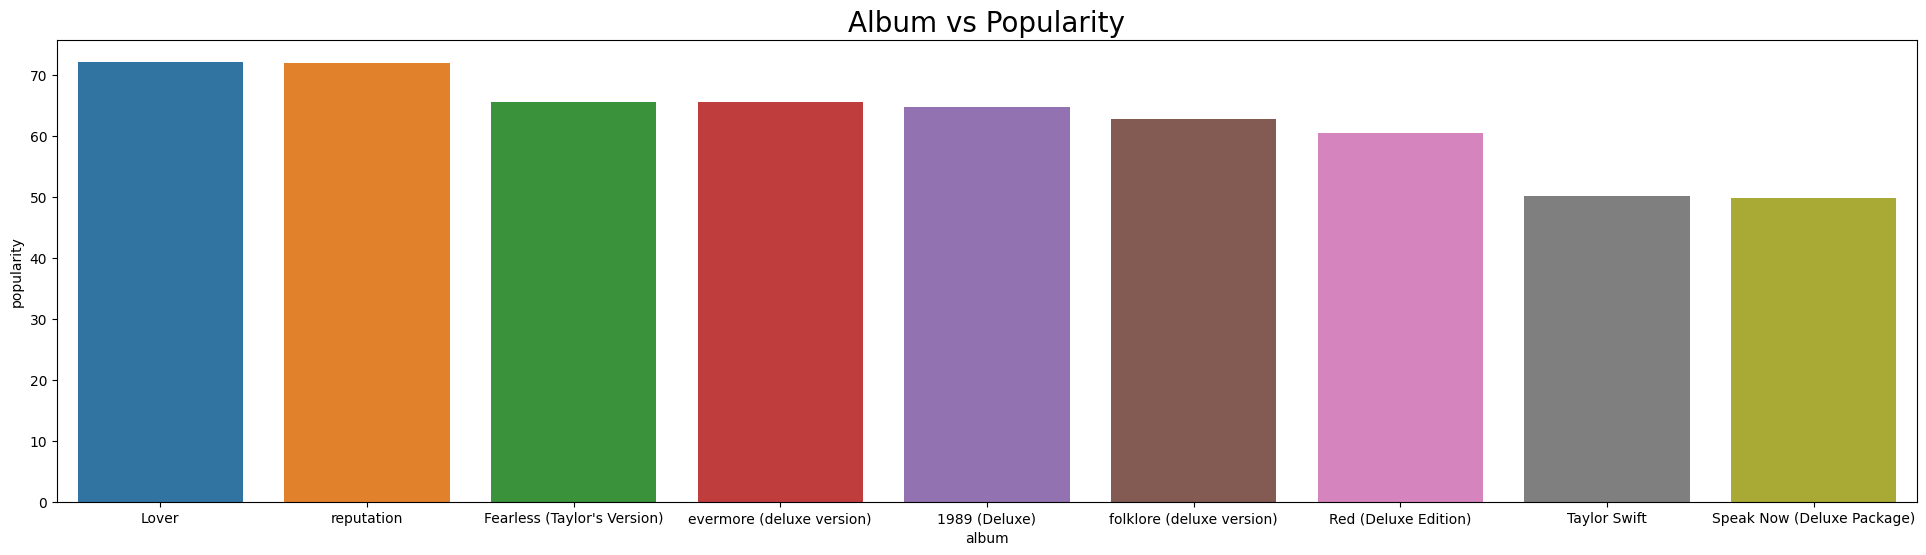

In [12]:
#creating dummy dataset to sort the data. It is to see which album is having most popularity.
apa = dataset.groupby('album').mean().sort_values(['popularity'],ascending=False)
apa = apa.reset_index()

plt.figure(figsize=(24, 6))
sns.barplot(x='album', y='popularity', data=apa)
plt.title('Album vs Popularity', fontsize=20)

<AxesSubplot: >

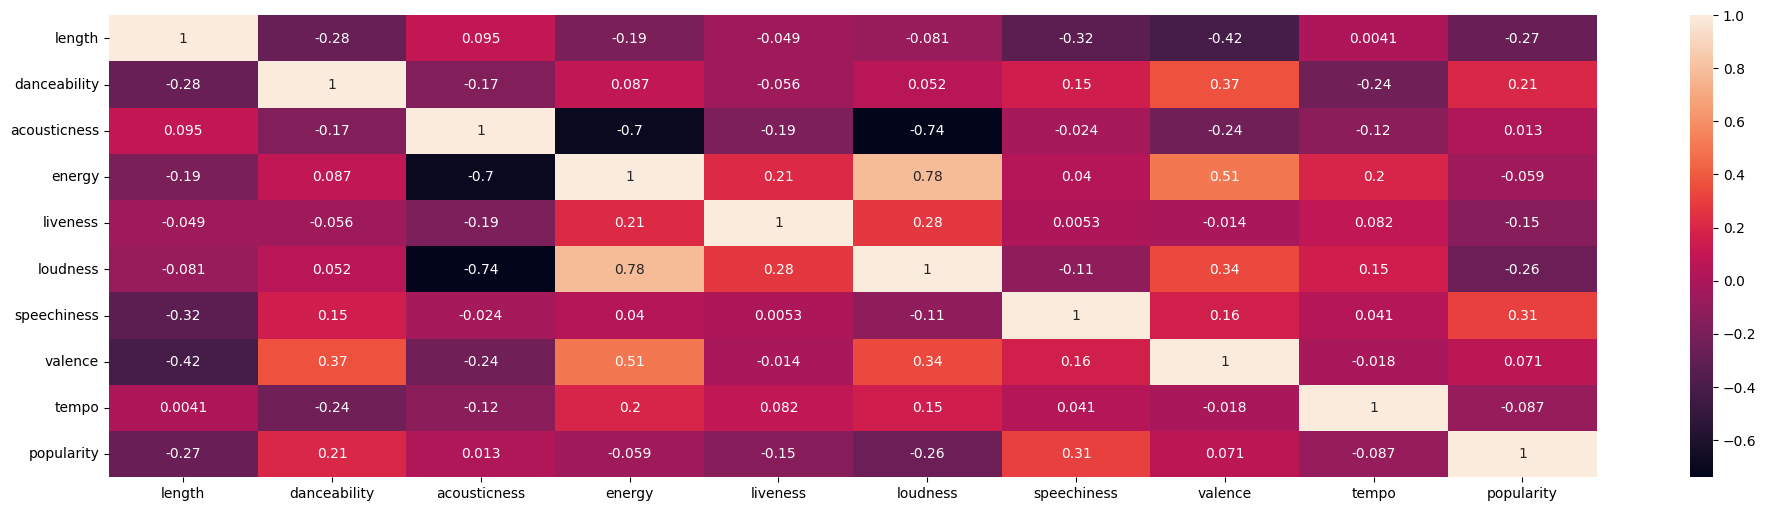

In [14]:
corr = dataset.corr()
plt.figure(figsize=(24, 6))
sns.heatmap(corr, annot=True)

Text(0.5, 1.0, 'Acousticness vs Energy')

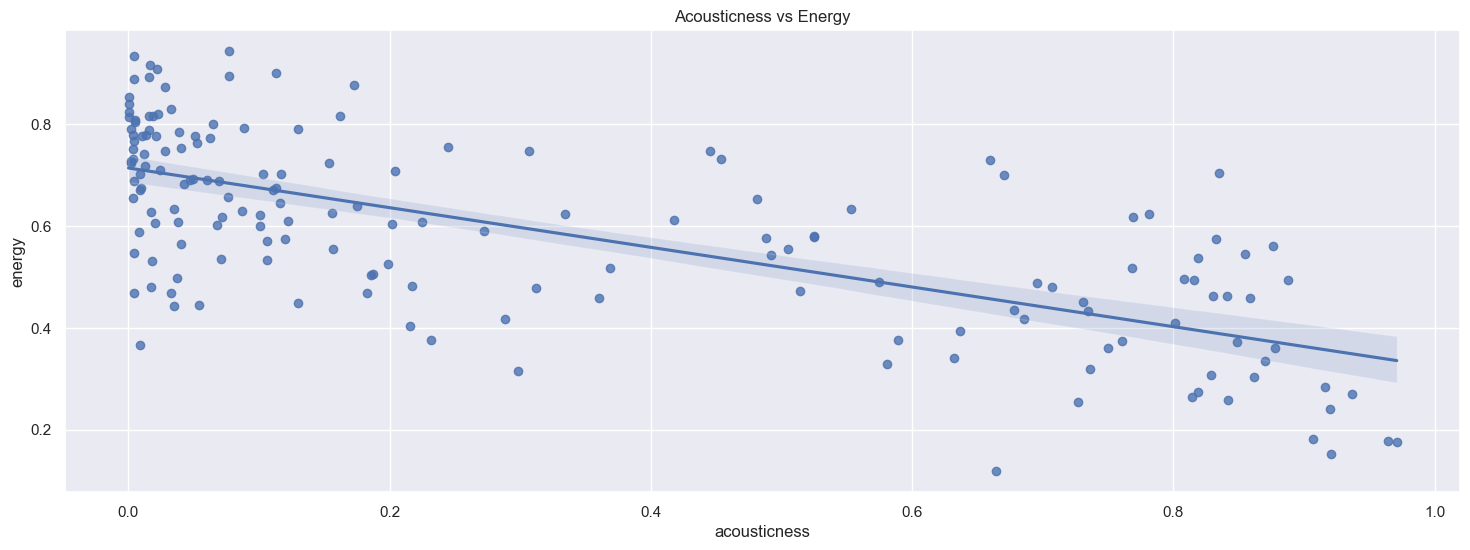

In [15]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(18, 6))
sns.regplot(x='acousticness', y='energy', data=dataset)
plt.title('Acousticness vs Energy')

Text(0.5, 1.0, 'Acousticness vs Loudness')

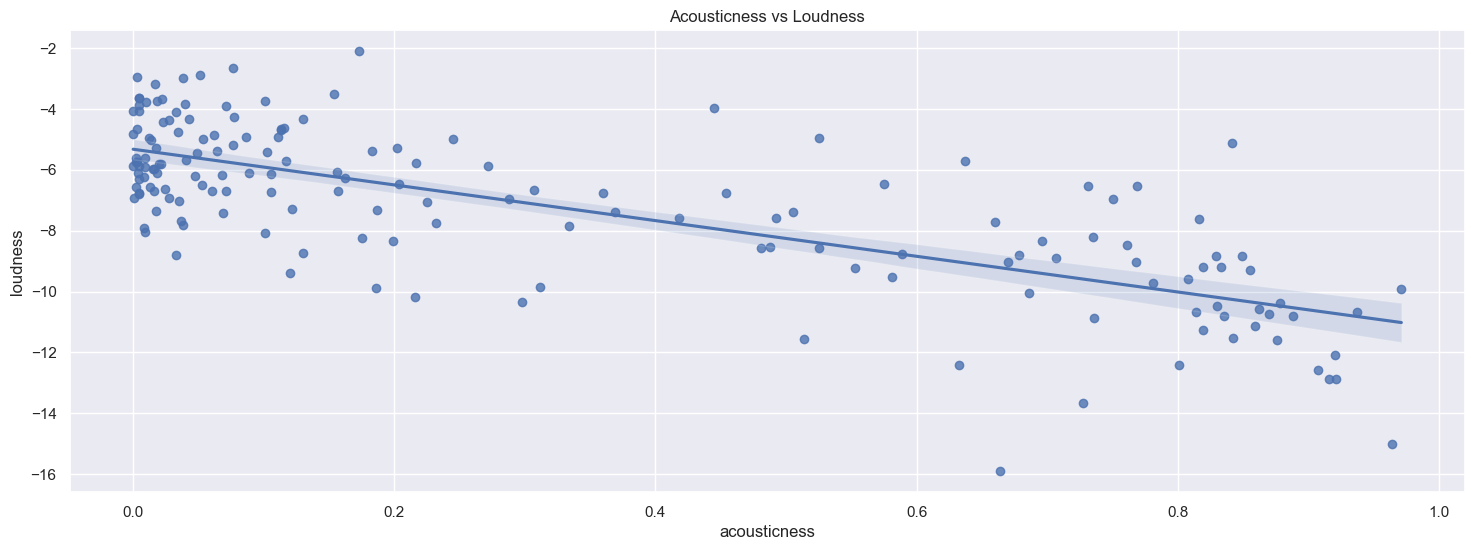

In [16]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(18, 6))
sns.regplot(x='acousticness', y='loudness', data=dataset)
plt.title('Acousticness vs Loudness')

Text(0.5, 1.0, 'Energy vs Loudness')

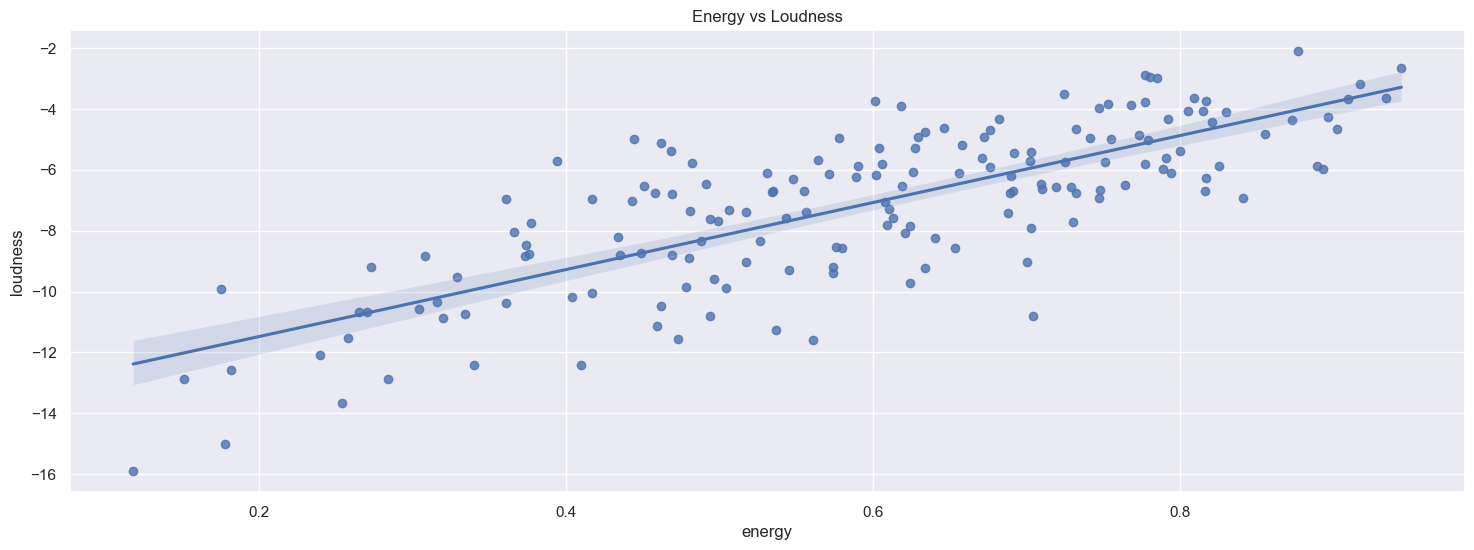

In [17]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(18, 6))
sns.regplot(x='energy', y='loudness', data=dataset)
plt.title('Energy vs Loudness')

In [18]:
dataset = dataset.drop('album', axis=1)
dataset

,length,danceability,acousticness,energy,liveness,loudness,speechiness,valence,tempo,popularity
0,232106,0.58,0.57,0.49,0.12,-6.46,0.03,0.42,76.01,49
1,173066,0.66,0.17,0.88,0.10,-2.10,0.03,0.82,105.59,54
2,203040,0.62,0.29,0.42,0.12,-6.94,0.02,0.29,99.95,59
3,199200,0.58,0.05,0.78,0.32,-2.88,0.03,0.43,115.03,49
4,239013,0.42,0.22,0.48,0.12,-5.77,0.03,0.26,175.56,50
...,...,...,...,...,...,...,...,...,...,...
163,277591,0.66,0.16,0.82,0.07,-6.27,0.05,0.71,135.94,74
164,244236,0.61,0.85,0.37,0.08,-8.82,0.03,0.13,106.01,65
165,189495,0.59,0.23,0.61,0.09,-7.06,0.04,0.51,90.20,67
166,208608,0.56,0.51,0.47,0.11,-11.55,0.05,0.41,101.93,66


In [19]:
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:,-1].values

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=27)

In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=27)
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=27)

In [22]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=0)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[60. 64.]
 [57. 55.]
 [68. 58.]
 [66. 66.]
 [68. 68.]
 [66. 61.]
 [66. 65.]
 [61. 63.]
 [59. 65.]
 [65. 66.]
 [61. 47.]
 [67. 66.]
 [65. 63.]
 [73. 78.]
 [69. 69.]
 [73. 72.]
 [67. 71.]
 [59. 59.]
 [65. 65.]
 [60. 55.]
 [69. 72.]
 [61. 64.]
 [68. 48.]
 [59. 64.]
 [56. 58.]
 [68. 74.]
 [65. 66.]
 [57. 50.]
 [66. 60.]
 [52. 49.]
 [69. 67.]
 [54. 50.]
 [59. 47.]
 [66. 60.]]


In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4206901039882722